# Prepaid Plan Analysis

## Introduction

In this project, we aim to compare the two plans offered by Megaline (Not a real company) to understand which plan is the most profitable. This analysis will be based on a relatively small sample of 500 Megaline clients, containing information such as their identity, location, the type of plan they use, and the number of calls and messages they sent in 2018. Our task is to analyze client behavior and determine which prepaid plan generates more revenue.

## Prepaid Plan Descriptions

### Surf Plan
- **Monthly Fee:** $20

- **Included Monthly Usage:**
  - 500 minutes of call duration
  - 50 SMS
  - 15 GB of data
- **Charges Beyond Limits:**
  - 3 cents per minute
  - 3 cents per SMS
  - $10 per GB of data

### Ultimate Plan
- **Monthly Fee:** $70

- **Included Monthly Usage:**
  - 3000 minutes of call duration
  - 1000 SMS
  - 30 GB of data
- **Charges Beyond Limits:**
  - 1 cent per minute
  - 1 cent per SMS
  - $7 per GB of data

## Methodology

To achieve the project goal, we will test two hypotheses:
1. The average usage of line service for Surf's clients and Ultimate's clients is the same.
2. The average revenue of the NY-NJ area is the same as other areas.

## Data Preparation and Processing

During the data processing, we encountered several obstacles and took corrective actions to ensure the data is valid for analysis. The procedures are detailed below:

### User Data
- The `churn_date` column has blank values because those customers are still using the service. These blanks will be left unchanged as they do not affect other data.
- The `reg_date` and `churn_date` columns are in object format but should be in date format. These will be reformatted using `to_datetime`.

### Calls Data
- The `call_date` column is in object format but should be in date format. This will be reformatted using `to_datetime`.

### Messages Data
- The `message_date` column is in object format but should be in date format. This will be reformatted using `to_datetime`.

### Internet Data
- The `session_date` column is in object format but should be in date format. This will be reformatted using `to_datetime`.

After correcting the data formats, we will continue with the following steps:
1. Creating columns necessary for analysis (usage of each service and its revenue and total revenue).
2. Categorizing states to differentiate the NY-NJ area from other states.
3. Combining all data into a single dataset named `main_data_6`.

## Data Description

### Users Table
- `user_id`: Unique user ID
- `first_name`: User's first name
- `last_name`: User's last name
- `age`: User's age (in years)
- `reg_date`: Subscription start date (dd, mm, yy)
- `churn_date`: Date the user stopped using the service (blank if still using)
- `city`: User's city
- `plan`: Name of the phone plan

### Calls Table
- `id`: Unique call ID
- `call_date`: Call date
- `duration`: Call duration (in minutes)
- `user_id`: ID of the user who made the call

### Messages Table
- `id`: Unique SMS ID
- `message_date`: Date the SMS was sent
- `user_id`: ID of the user who sent the SMS

### Internet Table
- `id`: Unique web session ID
- `mb_used`: Data volume used during the session (in megabytes)
- `session_date`: Date of the web session
- `user_id`: ID of the user

### Plans Table
- `plan_name`: Name of the phone plan
- `usd_monthly_fee`: Monthly fee (in USD)
- `minutes_included`: Monthly call duration allocation (in minutes)
- `messages_included`: Monthly SMS allocation
- `mb_per_month_included`: Monthly data allocation (in megabytes)
- `usd_per_minute`: Price per minute beyond the plan allocation
- `usd_per_message`: Price per SMS beyond the plan allocation
- `usd_per_gb`: Price per GB of additional data beyond the plan allocation (1 GB = 1024 megabytes)

## Analysis Steps

1. **Open the data files and explore general information.**
2. **Prepare the data:**
   - Convert data types as needed.
   - Identify and correct any data errors.
   - Document any errors found and how they were corrected.
3. **For each user, calculate:**
   - Number of calls made and minutes used per month.
   - Number of SMS sent per month.
   - Data volume used per month.
   - Monthly revenue from each user (subtract the free plan limits from the total usage and apply the relevant charges, then add the monthly plan fee).
4. **Analyze the data:**
   - Describe consumer behavior by identifying the minutes, messages, and data usage per month for each plan.
   - Calculate the average, variance, and standard deviation.
   - Create histograms and describe the distributions.
5. **Test the hypotheses:**
   - Determine if the average revenue from Ultimate and Surf plan users is different.
   - Determine if the average revenue from users in the NY-NJ area is different from users in other areas.
   - Specify the alpha value for hypothesis testing.
   - Explain the null and alternative hypotheses formulation.
   - Describe the criteria used for hypothesis testing and the rationale.


## **Data Loading and Initial Examination**

In [1]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 69.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import ttest_ind

In [3]:
data_user = pd.read_csv('/content/megaline_users.csv')
data_calls = pd.read_csv('/content/megaline_calls.csv')
data_messages = pd.read_csv('/content/megaline_messages.csv')
data_internet = pd.read_csv('/content/megaline_internet.csv')
data_plans = pd.read_csv('/content/megaline_plans.csv')

**User Dataset**



In [4]:
data_user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [5]:
data_user.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [6]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
data_user.duplicated().sum()

0

Based on the given data:

- The `churn_date` column has blank values because those customers are still using our service.
- The `reg_date` and `churn_date` columns are in object format but should be in date format.

Explanation of Each Column

Users Table
- `user_id` — User ID
- `first_name` — User's first name
- `last_name` — User's last name
- `age` — User's age (in years)
- `reg_date` — Subscription start date (dd, mm, yy)
- `churn_date` — Date the user stopped using the service (if blank or missing, the service is still in use at the time of data creation)
- `city` — User's city of residence
- `plan` — Name of the phone plan


**Calls Dataset**

In [8]:
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [9]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
data_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [11]:
data_calls.duplicated().sum()

0

Based on the given data:

- The `churn_date` column has blank values because those customers are still using our service.
- The `reg_date` and `churn_date` columns are in object format but should be in date format.

Explanation of Each Column

Users Table:
- `user_id` — User ID
- `first_name` — User's first name
- `last_name` — User's last name
- `age` — User's age (in years)
- `reg_date` — Subscription start date (dd, mm, yy)
- `churn_date` — Date the user stopped using the service (if blank or missing, the service is still in use at the time of data creation)
- `city` — User's city of residence
- `plan` — Name of the phone plan


**Calls Dataset**

In [12]:
data_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [13]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
data_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [15]:
data_calls.duplicated().sum()

0

Based on data given:

column call_date has object format when it is supposed to be date format.
Here are the explanation of each column:

- `id`: ID panggilan unik
- `call_date`: tanggal panggilan
- `duration`: durasi panggilan (dalam menit)
- `user_id`: ID pengguna yang melakukan panggilan


**Messages Dataset**

In [16]:
data_messages.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [17]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
data_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [19]:
data_messages.duplicated().sum()

0

Based on data given:

column message_date has object format when it is supposed to be date format.
Here are the explanation of each column:

- `id`: Unique SMS ID
- `message_date`: Date the SMS was sent
- `user_id`: User ID of the sender


**Internet Dataset**

In [20]:
data_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [21]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
data_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [23]:
data_internet.duplicated().sum()

0

Based on data given:

column session_date has object format when it is supposed to be date format.
Here are the explanation of each column:

- `id`: Unique web session ID
- `mb_used`: Data volume used during the session (in megabytes)
- `session_date`: Date of the web session
- `user_id`: User ID


**Plan Dataset**

In [24]:
data_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [25]:
data_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


Based on data given:

Here are the explanation of each column:

- `plan_name`: Name of the phone plan
- `usd_monthly_fee`: Monthly fee in US dollars
- `minutes_included`: Monthly allocation of call minutes
- `messages_included`: Monthly allocation of SMS messages
- `mb_per_month_included`: Monthly allocation of data volume (in megabytes)
- `usd_per_minute`: Price per minute if usage exceeds the allocated minutes (e.g., if the plan includes 100 minutes, any usage beyond the 100th minute incurs this charge)
- `usd_per_message`: Price per SMS if usage exceeds the allocated messages
- `usd_per_gb`: Price per additional gigabyte of data if usage exceeds the allocated data (1 GB = 1024 megabytes)


## **Data Preprocessing**

### **Fixing datatype**

**User Dataset**

In [26]:
data_user['reg_date'] = pd.to_datetime(data_user['reg_date'], format='%Y-%m-%d')
data_user['churn_date'] = pd.to_datetime(data_user['churn_date'], format='%Y-%m-%d')

In [27]:
data_user['reg_date'].describe()

count                           500
mean     2018-06-24 16:30:43.200000
min             2018-01-01 00:00:00
25%             2018-03-25 18:00:00
50%             2018-06-20 00:00:00
75%             2018-09-20 06:00:00
max             2018-12-31 00:00:00
Name: reg_date, dtype: object

In [28]:
data_user.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
37,1037,Reena,Velazquez,20,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-11,ultimate,NaT
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,NaT
183,1183,Jermaine,Gallegos,71,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-07-20,surf,NaT
104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,NaT


In [29]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Calls Dataset**

In [30]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [31]:
data_calls.sample(5)

,id,user_id,call_date,duration
31790,1120_142,1120,2018-05-23,0.00
65746,1237_353,1237,2018-11-06,11.32
19446,1073_299,1073,2018-06-09,4.29
84788,1312_280,1312,2018-07-02,1.10
22259,1082_229,1082,2018-11-23,0.00


In [32]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


**Messages Dataset**

In [33]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [34]:
data_messages.sample(5)

,id,user_id,message_date
7277,1059_149,1059,2018-08-14
19167,1124_54,1124,2018-12-09
1074,1011_37,1011,2018-10-21
60623,1382_215,1382,2018-11-27
67971,1439_365,1439,2018-11-05


In [35]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


**Internet Dataset**

In [36]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')


In [37]:
data_internet.sample(5)

,id,user_id,session_date,mb_used
6346,1036_119,1036,2018-11-25,146.59
51656,1232_219,1232,2018-04-20,323.01
101192,1482_36,1482,2018-11-08,529.39
66864,1312_87,1312,2018-05-30,0.00
51758,1232_339,1232,2018-11-03,747.89


In [38]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### **Categorize date to month and year**

We will categorize date data into month so it is easier to analyze

In [39]:
def to_month(dataset, col_name):
    temp = pd.to_datetime(dataset[col_name])
    temp = temp.dt.to_period("M")
    return temp

In [40]:
data_calls['month'] = to_month(data_calls, 'call_date')
data_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


In [41]:
data_messages['month'] = to_month(data_messages, 'message_date')
data_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [42]:
data_internet['month'] = to_month(data_internet, 'session_date')
data_internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


### **Extract State Name from Addrress Column**

As stated in the project description, we will analyse the revenue in certain state in USA. So it is important to categorize the state based on the city data given

In [43]:
data_user['clean_city'] = data_user['city'].str.split(', ').str[1]
data_user['clean_city'] = data_user['clean_city'].str.replace(' MSA', '')
data_user.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,WA


As we can see the state is in clean_city column

Since we will observe the revenue in NY-NJ state we will put sign to indicate those state by creating new column named nynj

In [44]:
data_user['clean_city'].unique()

array(['GA', 'WA', 'NV', 'OK', 'TX', 'CA', 'MI', 'FL', 'OH', 'IL-IN-WI',
       'TN', 'NY-NJ-PA', 'PA', 'DC-VA-MD-WV', 'IN', 'NE-IA',
       'PA-NJ-DE-MD', 'AL', 'NC-SC', 'CO', 'NM', 'MA-NH', 'AZ', 'OR-WA',
       'OH-KY-IN', 'SC', 'NY', 'TN-MS-AR', 'KY-IN', 'RI-MA', 'UT', 'HI',
       'CT', 'LA', 'VA-NC', 'MD', 'WI', 'VA', 'MO-IL', 'MN-WI', 'MO-KS',
       'NC'], dtype=object)

Since NY-NJ include in NY-NJ-PA, we can use this PA and will calculate the average, so it wont bother much. Moreover, PA or Pensylvania is a state next to NY and NJ so the carhacteristic is the same

In [45]:
data_user['nynj'] = data_user['clean_city'].str.contains('NY-NJ-PA', regex=True)
data_user['nynj'] = data_user['nynj'].replace(True, 1).replace(False, 0)
data_user.head()

<ipython-input-45-0eb490d9502a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_user['nynj'] = data_user['nynj'].replace(True, 1).replace(False, 0)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,nynj
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,WA,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NV,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,OK,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,WA,0


In [46]:
data_user.sample()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,nynj
86,1086,Adena,Macias,36,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-13,ultimate,NaT,NY-NJ-PA,1


### **Rounding the calls duration**

In [47]:
data_calls['duration'] = np.ceil(data_calls['duration']).astype('int16')
data_calls

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,2018-11
137731,1499_200,1499,2018-10-20,11,2018-10
137732,1499_201,1499,2018-09-21,9,2018-09
137733,1499_202,1499,2018-10-10,1,2018-10


As stated in project description, now we will round up the monthly usage of line service for each customer.

In [48]:
data_calls_agg = pd.pivot_table(data_calls, index=['user_id', 'month'], values='duration', aggfunc= 'sum').reset_index()
data_calls_agg

,user_id,month,duration
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426
...,...,...,...
2253,1498,2018-12,339
2254,1499,2018-09,346
2255,1499,2018-10,385
2256,1499,2018-11,308


In [49]:
num_zero_duration_calls = (data_calls_agg['duration'] == 0).sum()

print((num_zero_duration_calls/len(data_calls_agg))*100)

0.08857395925597875


In [50]:
data_calls_agg.loc[data_calls_agg['duration'] == 0]

,user_id,month,duration
432,1094,2018-10,0
1873,1407,2018-11,0


As we can see these data do not influence another data, and it is known that 0 value means miss calls so we can not count that as substraction of plan. Therefore it is okay for us to leave it that way.

we can see there are some outliers, but since there are also possibilities that people do actually in call for that long and we are not looking for conclusion of habit then we can ignore this.

### **Categorizing monthly text**

In [51]:
data_message_agg = pd.pivot_table(data_messages, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
data_message_agg.columns = ['user_id', 'month', 'sms']
data_message_agg.head()

,user_id,month,sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


### **Categorizing monthly data**

In [52]:
data_internet_agg = pd.pivot_table(data_internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
data_internet_agg

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


In [53]:
data_internet_agg['gb_used'] = data_internet_agg['mb_used'] / 1024
data_internet_agg

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,1.856904
1,1001,2018-08,6919.15,6.756982
2,1001,2018-09,13314.82,13.002754
3,1001,2018-10,22330.49,21.807119
4,1001,2018-11,18504.30,18.070605
...,...,...,...,...
2272,1498,2018-12,23137.69,22.595400
2273,1499,2018-09,12984.76,12.680430
2274,1499,2018-10,19492.43,19.035576
2275,1499,2018-11,16813.83,16.419756


In [54]:
data_internet_agg['gb_used'] = np.ceil(data_internet_agg['gb_used']).astype('int16')
data_internet_agg

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2
1,1001,2018-08,6919.15,7
2,1001,2018-09,13314.82,14
3,1001,2018-10,22330.49,22
4,1001,2018-11,18504.30,19
...,...,...,...,...
2272,1498,2018-12,23137.69,23
2273,1499,2018-09,12984.76,13
2274,1499,2018-10,19492.43,20
2275,1499,2018-11,16813.83,17


In [55]:
data_plans.columns = ['messages_included',
                      'mb_per_month_included',
                      'minutes_included',
                      'usd_monthly_pay',
                      'usd_per_gb',
                      'usd_per_message',
                      'usd_per_minute',
                      'plan']

### **Cross Join the data**

To make the data easier to analyze and make sure that nothing were left off, we will make cross join the data with the primary key of user_id and month

In [56]:
pd.DataFrame(data_internet_agg['month'].unique(), columns=['month']).sort_values(by='month')

,month
11,2018-01
10,2018-02
8,2018-03
9,2018-04
5,2018-05
6,2018-06
7,2018-07
1,2018-08
2,2018-09
3,2018-10


In [57]:
pd.DataFrame(data_calls_agg['month'].unique(), columns=['month']).sort_values(by='month')

,month
10,2018-01
11,2018-02
8,2018-03
9,2018-04
5,2018-05
6,2018-06
7,2018-07
1,2018-08
2,2018-09
3,2018-10


In [58]:
pd.DataFrame(data_message_agg['month'].unique(), columns=['month']).sort_values(by='month')

,month
11,2018-01
8,2018-02
9,2018-03
10,2018-04
5,2018-05
6,2018-06
7,2018-07
1,2018-08
2,2018-09
3,2018-10


In [59]:
temp_month = pd.DataFrame(data_internet_agg['month'].unique(), columns=['month']).sort_values(by='month')
temp_month['key'] = 1
temp_month

,month,key
11,2018-01,1
10,2018-02,1
8,2018-03,1
9,2018-04,1
5,2018-05,1
6,2018-06,1
7,2018-07,1
1,2018-08,1
2,2018-09,1
3,2018-10,1


In [60]:
temp_users = pd.DataFrame(data_user['user_id'].unique(), columns=['user_id']).sort_values(by='user_id')
temp_users['key'] = 1
temp_users.head()

,user_id,key
0,1000,1
1,1001,1
2,1002,1
3,1003,1
4,1004,1


In [61]:
main = temp_users.merge(temp_month, how='inner', on='key').drop('key', axis=1)
main.tail()

,user_id,month
5995,1499,2018-08
5996,1499,2018-09
5997,1499,2018-10
5998,1499,2018-11
5999,1499,2018-12


Now we have our cross join data, we will join the data one by one

Calculation of minute calls and number off calls

We will add column that consist of number of call per customer per month

In [62]:
data_calls_agg_2 = pd.pivot_table(data_calls, index=['user_id', 'month'], values='duration', aggfunc='count').reset_index()
data_calls_agg_2

,user_id,month,duration
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [63]:
main_data = main.merge(data_calls_agg, how='left', on=['user_id', 'month'])
main_data.columns = ['user_id', 'month', 'minute call']
main_data

,user_id,month,minute call
0,1000,2018-01,NaN
1,1000,2018-02,NaN
2,1000,2018-03,NaN
3,1000,2018-04,NaN
4,1000,2018-05,NaN
...,...,...,...
5995,1499,2018-08,NaN
5996,1499,2018-09,346.0
5997,1499,2018-10,385.0
5998,1499,2018-11,308.0


In [64]:
main_data_2 = main_data.merge(data_calls_agg_2, how='left', on=['user_id', 'month'])
main_data_2.columns = ['user_id', 'month', 'minute_call', 'call_num']
main_data_2

,user_id,month,minute_call,call_num
0,1000,2018-01,NaN,NaN
1,1000,2018-02,NaN,NaN
2,1000,2018-03,NaN,NaN
3,1000,2018-04,NaN,NaN
4,1000,2018-05,NaN,NaN
...,...,...,...,...
5995,1499,2018-08,NaN,NaN
5996,1499,2018-09,346.0,41.0
5997,1499,2018-10,385.0,53.0
5998,1499,2018-11,308.0,45.0


Calculation of SMS sent by user per month

In [65]:
main_data_3 = main_data_2.merge(data_message_agg, how='left', on=['user_id', 'month'])
main_data_3

,user_id,month,minute_call,call_num,sms
0,1000,2018-01,NaN,NaN,NaN
1,1000,2018-02,NaN,NaN,NaN
2,1000,2018-03,NaN,NaN,NaN
3,1000,2018-04,NaN,NaN,NaN
4,1000,2018-05,NaN,NaN,NaN
...,...,...,...,...,...
5995,1499,2018-08,NaN,NaN,NaN
5996,1499,2018-09,346.0,41.0,NaN
5997,1499,2018-10,385.0,53.0,NaN
5998,1499,2018-11,308.0,45.0,NaN


Calculation of Internet by user per month

In [66]:
main_data_4 = main_data_3.merge(data_internet_agg, how='left', on=['user_id', 'month'])
main_data_4


,user_id,month,minute_call,call_num,sms,mb_used,gb_used
0,1000,2018-01,NaN,NaN,NaN,NaN,NaN
1,1000,2018-02,NaN,NaN,NaN,NaN,NaN
2,1000,2018-03,NaN,NaN,NaN,NaN,NaN
3,1000,2018-04,NaN,NaN,NaN,NaN,NaN
4,1000,2018-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5995,1499,2018-08,NaN,NaN,NaN,NaN,NaN
5996,1499,2018-09,346.0,41.0,NaN,12984.76,13.0
5997,1499,2018-10,385.0,53.0,NaN,19492.43,20.0
5998,1499,2018-11,308.0,45.0,NaN,16813.83,17.0


Join all of the data

In [67]:
main_data_5 = main_data_4.merge(data_user, how='left', on='user_id')
main_data_5.head(2)

,user_id,month,minute_call,call_num,sms,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,nynj
0,1000,2018-01,NaN,NaN,NaN,NaN,NaN,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA,0
1,1000,2018-02,NaN,NaN,NaN,NaN,NaN,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,GA,0


In [68]:
main_data_6 = main_data_5.merge(data_plans, how='left', on='plan')
main_data_6.head(2)

,user_id,month,minute_call,call_num,sms,mb_used,gb_used,first_name,last_name,age,...,churn_date,clean_city,nynj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,2018-01,NaN,NaN,NaN,NaN,NaN,Anamaria,Bauer,45,...,NaT,GA,0,1000,30720,3000,70,7,0.01,0.01
1,1000,2018-02,NaN,NaN,NaN,NaN,NaN,Anamaria,Bauer,45,...,NaT,GA,0,1000,30720,3000,70,7,0.01,0.01


In [69]:
main_data_6.drop(['mb_used', 'reg_date', 'churn_date', 'age'], axis=1, inplace=True)
main_data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                6000 non-null   int64    
 1   month                  6000 non-null   period[M]
 2   minute_call            2258 non-null   float64  
 3   call_num               2258 non-null   float64  
 4   sms                    1806 non-null   float64  
 5   gb_used                2277 non-null   float64  
 6   first_name             6000 non-null   object   
 7   last_name              6000 non-null   object   
 8   city                   6000 non-null   object   
 9   plan                   6000 non-null   object   
 10  clean_city             6000 non-null   object   
 11  nynj                   6000 non-null   int64    
 12  messages_included      6000 non-null   int64    
 13  mb_per_month_included  6000 non-null   int64    
 14  minutes_included       6

All set, the data final named as main_data_6

Filling the missing value with 0

In [70]:
main_data_6[['minute_call', 'call_num', 'sms', 'gb_used']] = main_data_6[['minute_call', 'call_num', 'sms', 'gb_used']].fillna(0)

In [71]:
main_data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                6000 non-null   int64    
 1   month                  6000 non-null   period[M]
 2   minute_call            6000 non-null   float64  
 3   call_num               6000 non-null   float64  
 4   sms                    6000 non-null   float64  
 5   gb_used                6000 non-null   float64  
 6   first_name             6000 non-null   object   
 7   last_name              6000 non-null   object   
 8   city                   6000 non-null   object   
 9   plan                   6000 non-null   object   
 10  clean_city             6000 non-null   object   
 11  nynj                   6000 non-null   int64    
 12  messages_included      6000 non-null   int64    
 13  mb_per_month_included  6000 non-null   int64    
 14  minutes_included       6

### **Calculation of user usage**

Calls

In [72]:
main_data_6['extra_calls'] = (main_data_6['minute_call'] - main_data_6['minutes_included']) * main_data_6['usd_per_minute']


In [73]:
main_data_6.loc[main_data_6['extra_calls'] < 0, 'extra_calls'] = 0


Messages

In [74]:
main_data_6['extra_sms'] = (main_data_6['sms'] - main_data_6['messages_included']) * main_data_6['usd_per_message']


In [75]:
main_data_6.loc[main_data_6['extra_sms'] < 0, 'extra_sms'] = 0


Internet

In [76]:
main_data_6['gb_per_month_included'] = main_data_6['mb_per_month_included'] / 1024

In [77]:
main_data_6['gb_per_month_included']

0       30.0
1       30.0
2       30.0
3       30.0
4       30.0
        ... 
5995    15.0
5996    15.0
5997    15.0
5998    15.0
5999    15.0
Name: gb_per_month_included, Length: 6000, dtype: float64

In [78]:
main_data_6['extra_internet'] = (main_data_6['gb_used'] - main_data_6['gb_per_month_included']) * main_data_6['usd_per_gb']


In [79]:
main_data_6.loc[main_data_6['extra_internet'] < 0, 'extra_internet'] = 0


Now since we have revenue from each service, lets add them up to get the total revenue

In [80]:
main_data_6['total_income'] = main_data_6['usd_monthly_pay'] + main_data_6['extra_calls'] + main_data_6['extra_sms'] + main_data_6['extra_internet']
main_data_6.head(2)

,user_id,month,minute_call,call_num,sms,gb_used,first_name,last_name,city,plan,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_calls,extra_sms,gb_per_month_included,extra_internet,total_income
0,1000,2018-01,0.0,0.0,0.0,0.0,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,...,3000,70,7,0.01,0.01,0.0,0.0,30.0,0.0,70.0
1,1000,2018-02,0.0,0.0,0.0,0.0,Anamaria,Bauer,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,...,3000,70,7,0.01,0.01,0.0,0.0,30.0,0.0,70.0


## **Exploratory Data Analysis**

Now we will devide the main data into 2 based on the plan (Surf and Ultimate)

In [81]:
data_surf = main_data_6.loc[main_data_6['plan'] == 'surf'].reset_index(drop=True)

In [82]:
data_surf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                4068 non-null   int64    
 1   month                  4068 non-null   period[M]
 2   minute_call            4068 non-null   float64  
 3   call_num               4068 non-null   float64  
 4   sms                    4068 non-null   float64  
 5   gb_used                4068 non-null   float64  
 6   first_name             4068 non-null   object   
 7   last_name              4068 non-null   object   
 8   city                   4068 non-null   object   
 9   plan                   4068 non-null   object   
 10  clean_city             4068 non-null   object   
 11  nynj                   4068 non-null   int64    
 12  messages_included      4068 non-null   int64    
 13  mb_per_month_included  4068 non-null   int64    
 14  minutes_included       4

In [83]:
data_ultimate = main_data_6.loc[main_data_6['plan'] == 'ultimate'].reset_index(drop=True)

In [84]:
data_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932 entries, 0 to 1931
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                1932 non-null   int64    
 1   month                  1932 non-null   period[M]
 2   minute_call            1932 non-null   float64  
 3   call_num               1932 non-null   float64  
 4   sms                    1932 non-null   float64  
 5   gb_used                1932 non-null   float64  
 6   first_name             1932 non-null   object   
 7   last_name              1932 non-null   object   
 8   city                   1932 non-null   object   
 9   plan                   1932 non-null   object   
 10  clean_city             1932 non-null   object   
 11  nynj                   1932 non-null   int64    
 12  messages_included      1932 non-null   int64    
 13  mb_per_month_included  1932 non-null   int64    
 14  minutes_included       1

### **Calls**

Now we will compare the characteristic of data calls between Surf and Ultimate

In [85]:
surf_call_avg = pd.pivot_table(data_surf, index='month', values='minute_call', aggfunc='mean').reset_index()
ultimate_call_avg = pd.pivot_table(data_ultimate, index='month', values='minute_call', aggfunc='mean').reset_index()


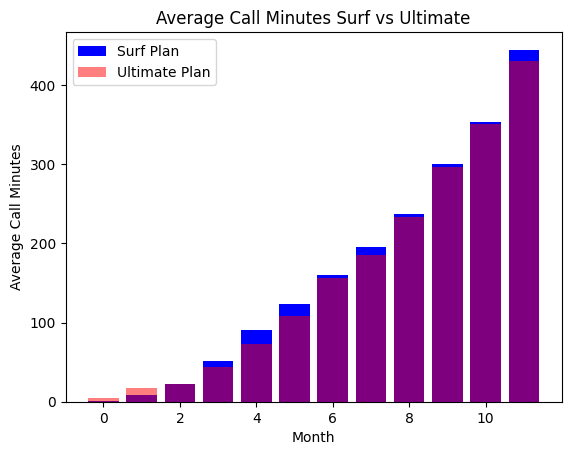

In [86]:
plt.bar(surf_call_avg.index, surf_call_avg['minute_call'], label='Surf Plan', color='blue')
plt.bar(ultimate_call_avg.index, ultimate_call_avg['minute_call'], label='Ultimate Plan', color='red', alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Average Call Minutes')
plt.title('Average Call Minutes Surf vs Ultimate')
plt.legend()
plt.show()

In [87]:
surf_std = round(surf_call_avg['minute_call'].std(), 1)
surf_var = round(surf_call_avg['minute_call'].var(), 1)
print('Surf:')
print(f'Standar Deviation for minute calls {surf_std}')
print(f'Varians for minute calls {surf_var}')
print()
ulti_std = round(ultimate_call_avg['minute_call'].std(), 1)
ulti_var = round(ultimate_call_avg['minute_call'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviation for minute calls {ulti_std}')
print(f'Varians for minute calls {ulti_var}')

Surf:
Standar Deviation for minute calls 144.6
Varians for minute calls 20909.7

Ultimate:
Standar Deviation for minute calls 141.9
Varians for minute calls 20136.6


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


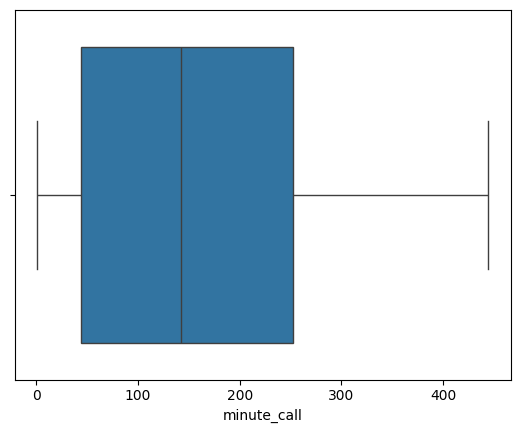

In [94]:
sns.boxplot(data=surf_call_avg, x='minute_call')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


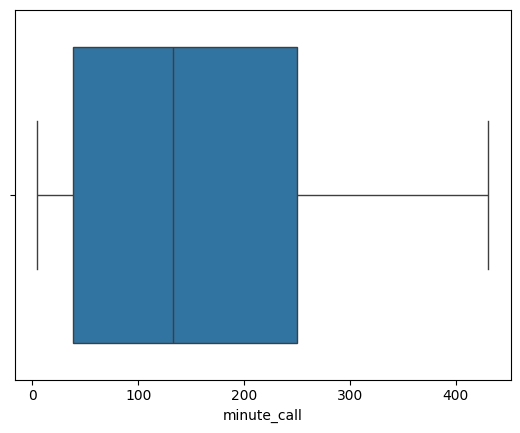

In [95]:
sns.boxplot(data=ultimate_call_avg, x='minute_call')
plt.show()

Findings:

- Some Surf & Ultimate subscriber made a phone call exeding the package.
- Surf Standar Deviation for minute calls 144.6
- Surf Varians for minute calls 20909.7
- Ultimate Standar Deviation for minute calls 141.9
- Ultimate Varians for minute calls 20136.6

Insights:

- The monthly usage of Surf plan and Ultimate plan are increasing the same.
- Shockingly, cheap plan like Surf with limited time for call compared to Ultimate in some months have higher average of call time.
- Eventhough Surf price is cheaper with limited quota for call service, the average usage is the same with Ultimate plan.

### **Text**

In [88]:
surf_sms_avg = pd.pivot_table(data_surf, index='month', values='sms', aggfunc='mean').reset_index()
ultimate_sms_avg = pd.pivot_table(data_ultimate, index='month', values='sms', aggfunc='mean').reset_index()

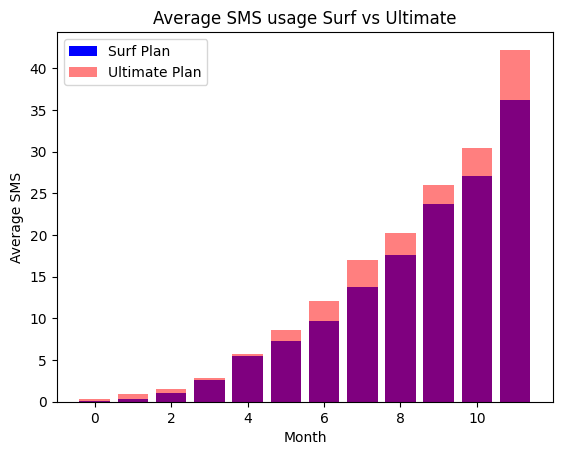

In [89]:
plt.bar(surf_sms_avg.index, surf_sms_avg['sms'], label='Surf Plan', color='blue')
plt.bar(ultimate_sms_avg.index, ultimate_sms_avg['sms'], label='Ultimate Plan', color='red', alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Average SMS')
plt.title('Average SMS usage Surf vs Ultimate')
plt.legend()
plt.show()

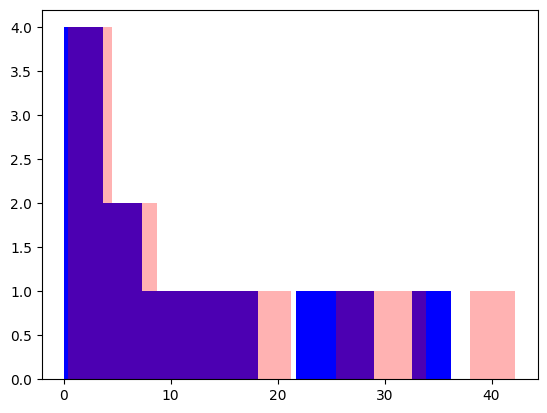

In [90]:
plt.hist(surf_sms_avg['sms'], bins=10, color='blue')
plt.hist(ultimate_sms_avg['sms'], bins=10, color='red', alpha=0.3)
plt.show()

In [91]:
surf_std_sms = round(surf_sms_avg['sms'].std(), 1)
surf_var_sms = round(surf_sms_avg['sms'].var(), 1)
print('Surf:')
print(f'Standar Deviation for sms usage {surf_std_sms}')
print(f'Varians for sms usage {surf_var_sms}')
print()
ulti_std_sms = round(ultimate_sms_avg['sms'].std(), 1)
ulti_var_sms = round(ultimate_sms_avg['sms'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviation for sms usage {ulti_std_sms}')
print(f'Varians for sms usage {ulti_var_sms}')

Surf:
Standar Deviation for sms usage 11.8
Varians for sms usage 140.2

Ultimate:
Standar Deviation for sms usage 13.5
Varians for sms usage 181.3


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


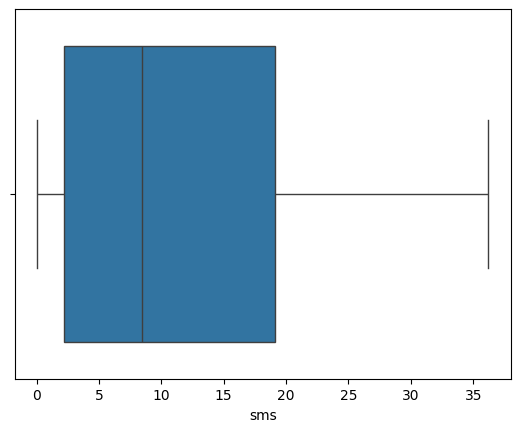

In [92]:
sns.boxplot(data=surf_sms_avg, x='sms')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


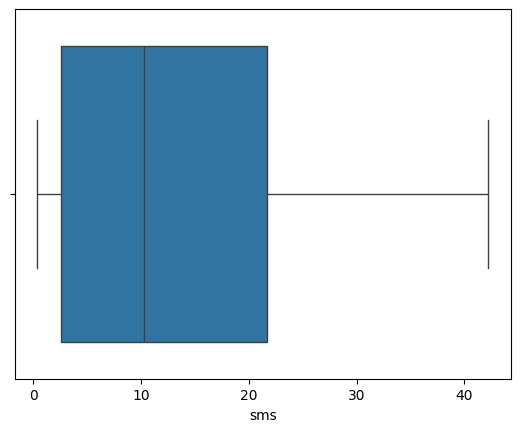

In [93]:
sns.boxplot(data=ultimate_sms_avg, x='sms')
plt.show()

Findings:

- Some Surf subscriber and Ultimate sent sms exeding the package.
- Surf Standar Deviation for sms usage 11.8
- Surf Varians for sms usage 140.2
- Ultimate Standar Deviation for sms usage 13.5
- Varians for sms usage 181.3

Insights:
- The monthly usage of Surf plan and Ultimate plan are increasing the same.
- It is rarely from Ultimate user to pass 1000 sms per month on average.

### **Internet**

In [96]:
surf_data_avg = pd.pivot_table(data_surf, index='month', values='gb_used', aggfunc='mean').reset_index()
ultimate_data_avg = pd.pivot_table(data_ultimate, index='month', values='gb_used', aggfunc='mean').reset_index()

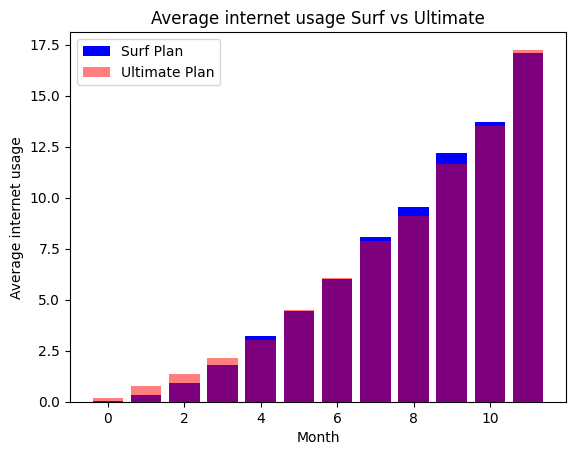

In [97]:
plt.bar(surf_data_avg.index, surf_data_avg['gb_used'], label='Surf Plan', color='blue')
plt.bar(ultimate_data_avg.index, ultimate_data_avg['gb_used'], label='Ultimate Plan', color='red', alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Average internet usage')
plt.title('Average internet usage Surf vs Ultimate')
plt.legend()
plt.show()

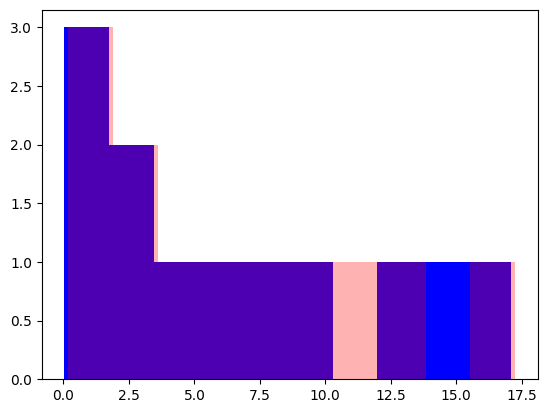

In [98]:
plt.hist(surf_data_avg['gb_used'], bins=10, color='blue')
plt.hist(ultimate_data_avg['gb_used'], bins=10, color='red', alpha=0.3)
plt.show()

In [99]:
surf_std_data = round(surf_data_avg['gb_used'].std(), 1)
surf_var_data = round(surf_data_avg['gb_used'].var(), 1)
print('Surf:')
print(f'Standar Deviation for internet usage {surf_std_data}')
print(f'Varians for internet usage {surf_var_data}')
print()
ulti_std_data = round(ultimate_data_avg['gb_used'].std(), 1)
ulti_var_data = round(ultimate_data_avg['gb_used'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviation for internet usage {ulti_std_data}')
print(f'Varians for internet usage {ulti_var_data}')

Surf:
Standar Deviation for internet usage 5.7
Varians for internet usage 32.5

Ultimate:
Standar Deviation for internet usage 5.5
Varians for internet usage 30.4


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


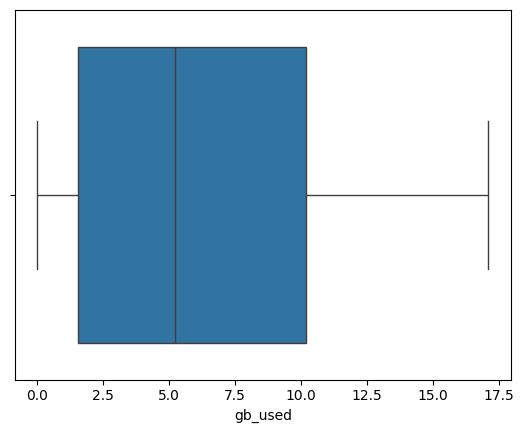

In [100]:
sns.boxplot(data=surf_data_avg, x='gb_used')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


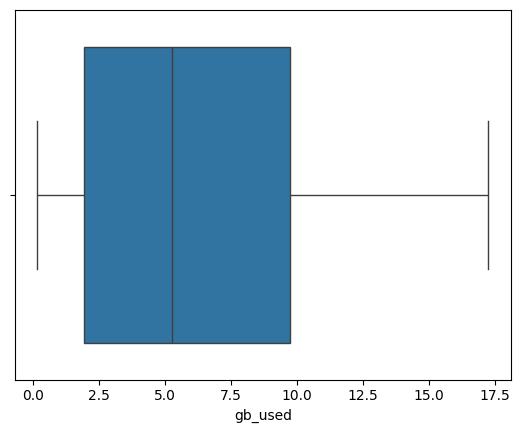

In [101]:
sns.boxplot(data=ultimate_data_avg, x='gb_used')
plt.show()

Findings:

- Surf Standar Deviation for internet usage 5.7
- Surf Varians for internet usage 32.5
- Ultimate Standar Deviation for internet usage 5.5
- Varians for internet usage 30.4


Insights:
- The monthly usage of Surf plan and Ultimate plan are increasing the same.
- The average usage between both plan is relatively the same.

### **Revenue Stream**

In [102]:
revenue_avg_surf = pd.pivot_table(data_surf, index='month', values='total_income', aggfunc='sum').reset_index()
revenue_avg_ultimate = pd.pivot_table(data_ultimate, index='month', values='total_income', aggfunc='sum').reset_index()

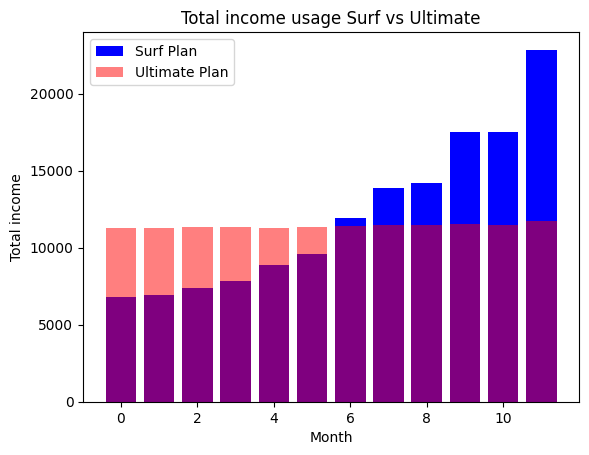

In [103]:
plt.bar(revenue_avg_surf.index, revenue_avg_surf['total_income'], label='Surf Plan', color='blue')
plt.bar(revenue_avg_ultimate.index, revenue_avg_ultimate['total_income'], label='Ultimate Plan', color='red', alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Total income')
plt.title('Total income usage Surf vs Ultimate')
plt.legend()
plt.show()

In [104]:
surf_std_rev = round(revenue_avg_surf['total_income'].std(), 1)
surf_var_rev = round(revenue_avg_surf['total_income'].var(), 1)
print('Surf:')
print(f'Standar Deviation for total income {surf_std_rev}')
print(f'Varians for total income {surf_var_rev}')
print()
ulti_std_rev = round(revenue_avg_ultimate['total_income'].std(), 1)
ulti_var_rev = round(revenue_avg_ultimate['total_income'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviation for total income {ulti_std_rev}')
print(f'Varians for total income {ulti_var_rev}')

Surf:
Standar Deviation for total income 5177.2
Varians for total income 26803403.3

Ultimate:
Standar Deviation for total income 141.6
Varians for total income 20061.8


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


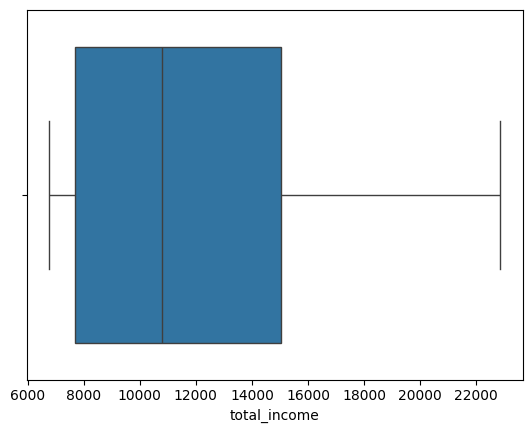

In [105]:
sns.boxplot(data=revenue_avg_surf, x='total_income')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


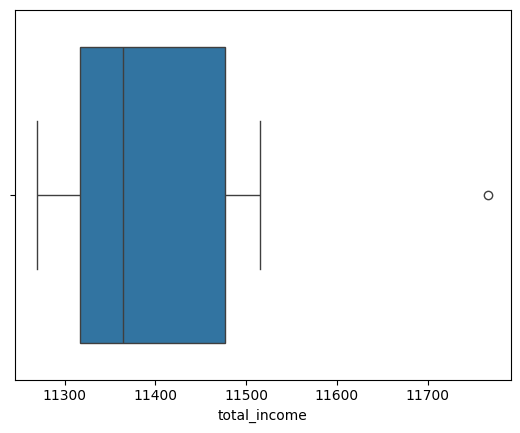

In [106]:
sns.boxplot(data=revenue_avg_ultimate, x='total_income')
plt.show()

Findings:

- Surf Standar Deviation for total income 3740.1
- Surf Varians for total income 13988486.5
- Ultimate Standar Deviation for total income 6.8
- Ultimate Varians for total income 45.7


Insights:
- Compared to Ultimate, Surf total income are more vary.
- Started with lower number of revenue in 2018, Surf plan steadily grew compare to the stagnancy of Ultimate plan revenue.

## **Testing Statistical Hypotheses**

### **Hypothesis No.1**

Let's test the hypothesis, in this case we will use two sample t-test independent for statistical testing with H0 and H1 as below:

- H0 = The average usage of line service for Surf's clients and Ultimate's clients are same.
- H1 = The average usage of line service for Surf's clients and Ultimate's clients are not the same.

We will set alpha as follow:

- Alpha = 5%

In [107]:
main_data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                6000 non-null   int64    
 1   month                  6000 non-null   period[M]
 2   minute_call            6000 non-null   float64  
 3   call_num               6000 non-null   float64  
 4   sms                    6000 non-null   float64  
 5   gb_used                6000 non-null   float64  
 6   first_name             6000 non-null   object   
 7   last_name              6000 non-null   object   
 8   city                   6000 non-null   object   
 9   plan                   6000 non-null   object   
 10  clean_city             6000 non-null   object   
 11  nynj                   6000 non-null   int64    
 12  messages_included      6000 non-null   int64    
 13  mb_per_month_included  6000 non-null   int64    
 14  minutes_included       6

In [108]:
calls_avg = pd.pivot_table(main_data_6, index='user_id', values='minute_call', columns='plan', aggfunc='mean').reset_index()
calls_avg

plan,user_id,surf,ultimate
0,1000,NaN,10.333333
1,1001,144.000000,NaN
2,1002,69.083333,NaN
3,1003,92.000000,NaN
4,1004,231.000000,NaN
...,...,...,...
495,1495,147.083333,NaN
496,1496,121.250000,NaN
497,1497,NaN,25.000000
498,1498,267.583333,NaN


In [109]:
alpha = 0.05
p_value = ttest_ind(calls_avg['surf'], calls_avg['ultimate'], nan_policy='omit').pvalue
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print("H0 Diterima: The average usage of line service for Surfs client's and Ultimate's clients are same")
else:
    print("H1 Diterima: The average usage of line service for Surf's clients and Ultimate's clients are not the same")
print('Surf average call', calls_avg['surf'].mean())
print('Ultimate average call', calls_avg['ultimate'].mean())

P-Value: 0.6954812078892558
H0 Diterima: The average usage of line service for Surfs client's and Ultimate's clients are same
Surf average call 165.78736479842675
Ultimate average call 160.416149068323


### **Hypothesis No.2**

Let's test the hypothesis, in this case we will use two sample t-test independent for statistical testing with H0 and H1 as below:

- H0 = The average revenue of NY-NJ area with others area are same.
- H1 = The average revenue of NY-NJ area with others area are not the same.

We will set alpha as follow:

- Alpha = 5%

In [110]:
rev_avg = pd.pivot_table(main_data_6, index='user_id', columns='nynj', values='total_income', aggfunc='mean').reset_index()
rev_avg

nynj,user_id,0,1
0,1000,70.000000,NaN
1,1001,32.507500,NaN
2,1002,23.333333,NaN
3,1003,31.510000,NaN
4,1004,57.500000,NaN
...,...,...,...
495,1495,NaN,52.775
496,1496,23.333333,NaN
497,1497,70.000000,NaN
498,1498,NaN,72.500


In [111]:
alpha = 0.05
p_value = ttest_ind(rev_avg[1], rev_avg[0], nan_policy='omit').pvalue

print(f'P-Value: {p_value}')

if p_value >= alpha:
    print("H0 Accepted: The average revenue of NY-NJ area is the same as other areas")
else:
    print("H1 Accepted: The average revenue of NY-NJ area is not the same as other areas")

print('Average revenue for NY-NJ area:', rev_avg[1].mean())
print('Average revenue for Non NY-NJ areas:', rev_avg[0].mean())

P-Value: 0.364105054132015
H0 Accepted: The average revenue of NY-NJ area is the same as other areas
Average revenue for NY-NJ area: 44.79203125
Average revenue for Non NY-NJ areas: 47.479529761904764


## **General Conclusion**

**General**

The aim of this project is to compare two plans offered by Megaline company in order to understand which plan is the most profitable one.

The method used in this project is by answer 2 hypothesis which are:

1. The average usage of line service for Surf's clients and Ultimate's clients are same.
2. The average revenue of NY-NJ area with others area are same.

**Data Processing**

During the data processing we faced some obstacle and we did some action in order to have valid data to analyze. The procedure as well stated as bellow:

1. Data User

- column churn_date has blank value because those customers are still using our service. (Leave it that way because it does not bother other data).
- column reg_date and churn_date have value of object where it is supposed to be date format. (Reformat type using to_datetime)

2. Data Calls

- column call_date has object format when it is supposed to be date format. (Reformat type using to_datetime)

3. Data Messages

- column message_date has object format when it is supposed to be date format. (Reformat type using to_datetime)

4. Data Internet

- column session_date has object format when it is supposed to be date format. (Reformat type using to_datetime)

After we done correcting the data above we continue the process as bellow:

1. Creating column that needed for analysis (Usage of each service and its revenue and total revenue)
2. Categorize state so we can get NY-NJ state to compare with other states.
3. Combine all data into one named main_data_6.

**Exploratory Data Analysis**

1. Calls Service

Findings:

- Some Surf & Ultimate subscriber made a phone call exeding the package.
- Surf Standar Deviation for minute calls 144.6
- Surf Varians for minute calls 20909.7
- Ultimate Standar Deviation for minute calls 141.9
- Ultimate Varians for minute calls 20136.6

Insights:
- The monthly usage of Surf plan and Ultimate plan are increasing the same.
- Shockingly, cheap plan like Surf with limited time for call compared to Ultimate in some months have higher average of call time.
- Eventhough Surf price is cheaper with limited quota for call service, the average usage is the same with Ultimate plan.


2. SMS Service

Findings:

- Some Surf subscriber and Ultimate sent sms exeding the package.
- Surf Standar Deviation for sms usage 11.8
- Surf Varians for sms usage 140.2
- Ultimate Standar Deviation for sms usage 13.5
- Varians for sms usage 181.3

Insights:
- The monthly usage of Surf plan and Ultimate plan are increasing the same.
- It is rarely from Ultimate user to pass 1000 sms per month on average.


3. Internet Service

Findings:

- Surf Standar Deviation for internet usage 5.7
- Surf Varians for internet usage 32.5
- Ultimate Standar Deviation for internet usage 5.5
- Varians for internet usage 30.4

Insights:
- The monthly usage of Surf plan and Ultimate plan are increasing the same.
- The average usage between both plan is relatively the same.

**Hypothesis Testing**

1. The average usage of line service for Surfs client's and Ultimate's clients are same
2. The average revenue of NY-NJ area is the same as other areas

**Final Summary**

Based on the calculation we can see that:

1. The revenue from Ultimate plan tend to be stagnant through out the year of 2018.
2. In contrast, started lower than Ultimate plan, the positive trend showed by Surf plan.
3. Surf plan offered small based price, eventhough the excess fee much expensive than Ultimate plan, the customer sees this as safer option.
4. To support point 3, on average the usage of Ultimate and Surf are almost the same, meaning Ultimate plan on average quota are unused.
5. Surf plan customer might found point 3 and point 4 and choosed surf plan because of cheap base tariff and offered flexibility.
6. On average there is no different in revenue for customer in New York New Jersey area compared to the rest of the states.

Recommendation.
1. The sales need to focus on Surf plan because of the positive trend showed throughout the year of 2018.
2. If there is no additional in operating cost regarding the based quota for Ultimate plan, the sales team need to consider to boost the sale of Ultimate plan as well.
3. Sales team need to consider new way to promote ultimate plan to avoid further stagnancy in revenue.
